# Lab 5 - Unsupervised Learning <a class="tocSkip">

use elbow point for hierarchical and kmeans

kmeans:
+ interclass var (WSS within sum of squares) vs no of clusters => elbow

hierarchical:
+ use dendrogram height, last 2 clusters heights are relevant

need Silhouette Width (https://en.wikipedia.org/wiki/Silhouette_(clustering))
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
+ https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
+ https://plot.ly/scikit-learn/plot-kmeans-silhouette-analysis/

...

+ https://en.wikipedia.org/wiki/Rand_index#Adjusted_Rand_index
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
+ https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

...

+ https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
+ https://plot.ly/scikit-learn/plot-cluster-iris/
+ https://plot.ly/scikit-learn/plot-kmeans-digits/
+ https://plot.ly/python/3d-point-clustering/
+ https://community.plot.ly/t/what-colorscales-are-available-in-plotly-and-which-are-the-default/2079
+ https://plot.ly/python/cmocean-colorscales/
+ https://matplotlib.org/cmocean/
+ 


http://cs.joensuu.fi/sipu/datasets/
https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a
https://github.com/deric/clustering-benchmark/blob/master/README.md
http://neupy.com/2017/12/09/sofm_applications.html
https://wonikjang.github.io/deeplearning_unsupervised_som/2017/06/30/som.html
https://www.kaggle.com/raghavrastogi75/fraud-detection-using-self-organising-maps
https://medium.com/@navdeepsingh_2336/self-organizing-maps-for-machine-learning-algorithms-ad256a395fc5
https://heartbeat.fritz.ai/introduction-to-self-organizing-maps-soms-98e88b568f5d


# Imports

## Import dependencies

In [1]:
from datetime import datetime as dt

import numpy as np
import pandas as pd

# viz libs
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

random_state=42
nb_start = dt.now()

## Import data

In [2]:
features = pd.read_csv('train_values.csv')
labels = pd.read_csv('train_labels.csv')

xlab = 'serum_cholesterol_mg_per_dl'
ylab = 'resting_blood_pressure'

print(labels.head())
features.head()

  patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
cluster_arr = np.array(features[[xlab,ylab]]).reshape(-1,2)

cluster_arr[:5]

array([[308, 128],
       [214, 110],
       [304, 125],
       [223, 152],
       [270, 178]])

## Cluster subsample visualization

In [4]:
x = features['serum_cholesterol_mg_per_dl']
y = features['resting_blood_pressure']

trace = [go.Scatter(
    x = x,
    y = y,
    name = 'data',
    mode = 'markers',
    hoverinfo = 'text',
    text = ['x: %s<br>y: %s' % (x_i, y_i) for x_i, y_i in zip(x, y)]
)]

layout = go.Layout(
    xaxis = dict({'title': xlab}),
    yaxis = dict({'title': ylab})
)

fig = go.Figure(data=trace, layout=layout)
iplot(fig, layout)

# Hierarchical Clustering


+ https://scikit-learn.org/stable/modules/clustering.html
+ https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
+ https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/



In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Single Link

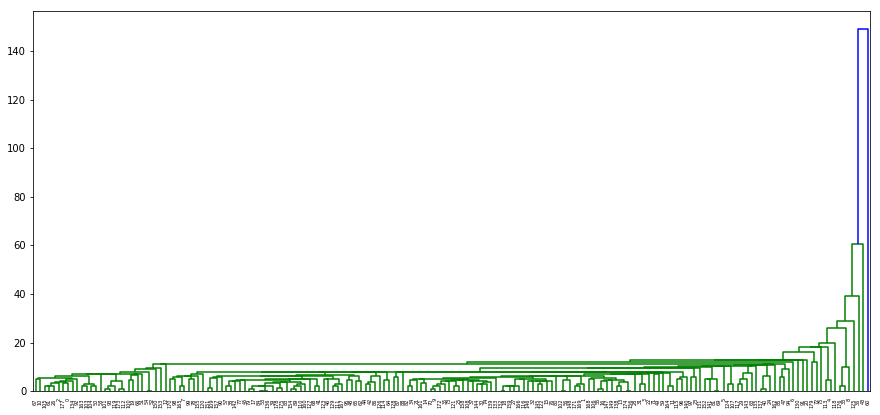

In [6]:
plt.figure(figsize=(15, 7))

linked = linkage(cluster_arr, 'single')

# labelList = range(1, 11)
dendrogram(linked,  
            orientation='top',
#             labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## Complete Link

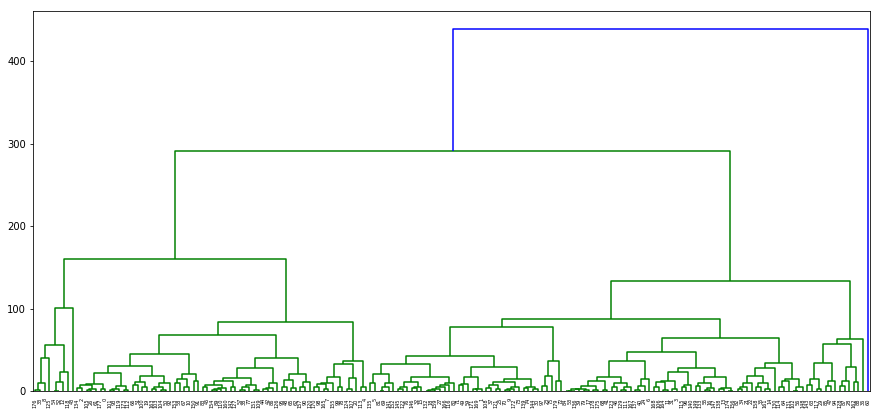

In [8]:
plt.figure(figsize=(15, 7))

linked = linkage(cluster_arr, 'complete')

# labelList = range(1, 11)
dendrogram(linked,  
            orientation='top',
#             labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## Average Link

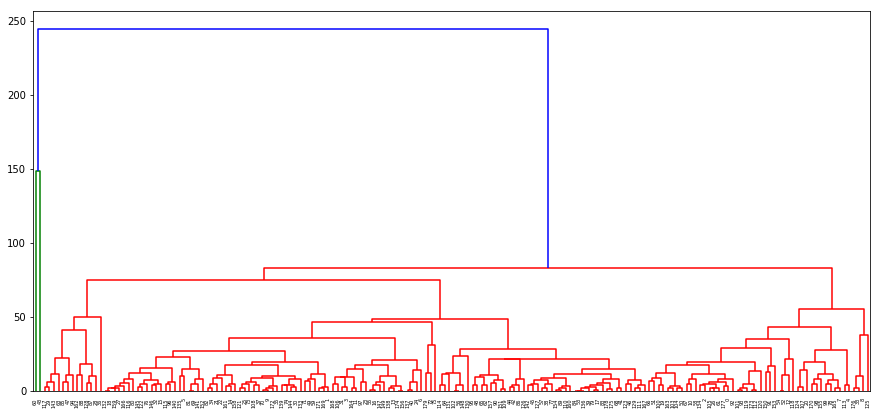

In [9]:
plt.figure(figsize=(15, 7))

linked = linkage(cluster_arr, 'average')

# labelList = range(1, 11)
dendrogram(linked,  
            orientation='top',
#             labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## Ward Variance

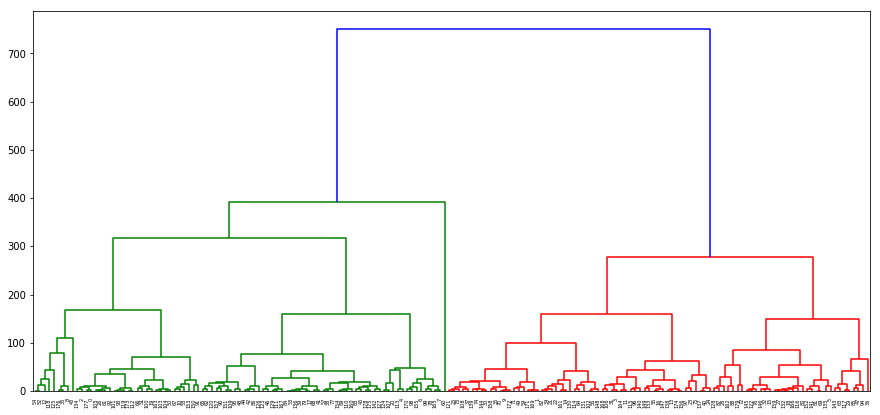

In [10]:
plt.figure(figsize=(15, 7))

linked = linkage(cluster_arr, 'ward')

# labelList = range(1, 11)
dendrogram(linked,  
            orientation='top',
#             labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

# Density-based clustering

## DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
clustering = DBSCAN(eps=3, min_samples=2).fit(cluster_arr)

clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [69]:
y_pred = clustering.labels_

y_pred

array([-1,  0, -1,  1, -1, -1, -1,  2, -1,  3, -1,  4, -1,  5, -1, -1,  6,
        7,  8, -1, -1, -1, -1, -1, -1,  9, 10,  8, -1, 11, 12,  1, -1, 13,
       14,  3, -1, -1, 15,  7, 16, 17, 18, -1, 18, -1, -1, -1, -1, -1, 19,
       -1, 20,  7, 20,  6, 21, 15, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1,
       17, 22,  3, -1, -1, -1, 12, -1, -1, -1, -1,  7, -1, 22, 14, -1,  7,
       -1, -1, -1, -1, 23, -1, -1, -1, 24, -1, -1, -1, -1, -1, -1, -1, 24,
       21, 19, 19, 10, -1, 25, -1, 26, 23, 27, 28, -1, -1, -1, -1, 11, -1,
       24, -1,  9, 29, -1, 25, -1, -1, -1, -1, 27, -1, -1,  8, -1, -1, -1,
        7, 16,  5, -1, -1, -1, -1, -1, 12, 29, -1, -1, -1, -1, -1, 26, -1,
       -1, 23, -1, 30, -1, -1,  8, 23, -1, -1, 19,  4,  2,  8, 27, -1,  0,
       -1,  0,  3, 28, 30, 31, 13, -1, 31, -1])

In [72]:
x = cluster_arr[:, 0]
y = cluster_arr[:, 1]

# col = ['#F33' if i == 1 else '#33F' for i in y_pred]

trace = [go.Scatter(
    x = x,
    y = y,
    marker = dict(
        # color = col,
        color = y_pred,
        colorscale='MAGMA',
        colorbar=dict(
            title='Labels'
        ),
    ),
    name = 'data',
    mode = 'markers',
    hoverinfo = 'text',
    text = ['x: %s<br>y: %s' % (x_i, y_i) for x_i, y_i in zip(x, y)]
)]

layout = go.Layout(
    xaxis = dict({'title': xlab}),
    yaxis = dict({'title': ylab})
)

fig = go.Figure(data=trace, layout=layout)
iplot(fig, layout)

## Other based on DBSCAN

# K-Means

In [14]:
from sklearn.cluster import KMeans

In [30]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(cluster_arr)

y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0], dtype=int32)

In [73]:
x = cluster_arr[:, 0]
y = cluster_arr[:, 1]

# col = ['#F33' if i == 1 else '#33F' for i in y_pred]

trace = [go.Scatter(
    x = x,
    y = y,
    marker = dict(
        # color = col,
        color = y_pred,
        colorscale='YlOrRd',
        colorbar=dict(
            title='Labels'
        ),
    ),
    name = 'data',
    mode = 'markers',
    hoverinfo = 'text',
    text = ['x: %s<br>y: %s' % (x_i, y_i) for x_i, y_i in zip(x, y)]
)]

layout = go.Layout(
    xaxis = dict({'title': xlab}),
    yaxis = dict({'title': ylab})
)

fig = go.Figure(data=trace, layout=layout)
iplot(fig, layout)

In [66]:
Ks = range(2, 11)
km = [KMeans(n_clusters=i) for i in Ks] # , verbose=True
# score   = [km[i].fit(cluster_arr).score(cluster_arr) for i in range(len(km))]

fitted = [km[i].fit(cluster_arr) for i in range(len(km))]
score  = [fitted[i].score(cluster_arr) for i in range(len(km))]
inertia  = [fitted[i].inertia_ for i in range(len(km))]

relative_diff = [inertia[0]]
relative_diff.extend([inertia[i-1] - inertia[i] for i in range(1, len(inertia))])

print(fitted[:1])
print(score[:1])
print(inertia[:1])
print(relative_diff)

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)]
[-262575.0744047605]
[262575.0744047619]
[262575.0744047619, 81100.12702968283, 57975.37985665155, 27262.66869955197, 15665.637483075843, 12691.7579821244, 12641.931973544371, 7095.630279691366, 5617.9081140419075]


In [37]:
fitted[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
dir(fitted[0])[:5]

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__']

In [65]:
data = [
#     go.Bar(
#         x = list(Ks),
#         y = score
#     ),
    go.Bar(
        x = list(Ks),
        y = inertia,
        text = ['Diff is: %s' % diff for diff in relative_diff]
    ),
    go.Scatter(
        x = list(Ks),
        y = inertia
    ),
]


layout = go.Layout(
    xaxis = dict(
        title = 'No of Clusters [%s-%s]' % (min(Ks), max(Ks))
    ),
    yaxis = dict(
        title = 'Sklearn score / inertia'
    ),
    # barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [68]:
data = [
    go.Bar(
        x = list(Ks),
        y = relative_diff
    ),
    go.Scatter(
        x = list(Ks),
        y = relative_diff
    ),
]


layout = go.Layout(
    xaxis = dict(
        title = 'No of Clusters [%s-%s]' % (min(Ks), max(Ks))
    ),
    yaxis = dict(
        title = 'Pairwise difference'
    ),
    # barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [16]:
nb_end = dt.now()

'Time elapsed: %s' % (nb_end - nb_start)

'Time elapsed: 0:00:06.224316'

---

# Bibliography